In [1]:
import os

base_path = '/kaggle/input/prepro-augent/pro+aug'
print("Classes (folders):", os.listdir(base_path))

Classes (folders): ['im_Parabasal', 'im_Dyskeratotic', 'im_Metaplastic', 'im_Superficial-Intermediate', 'im_Koilocytotic']


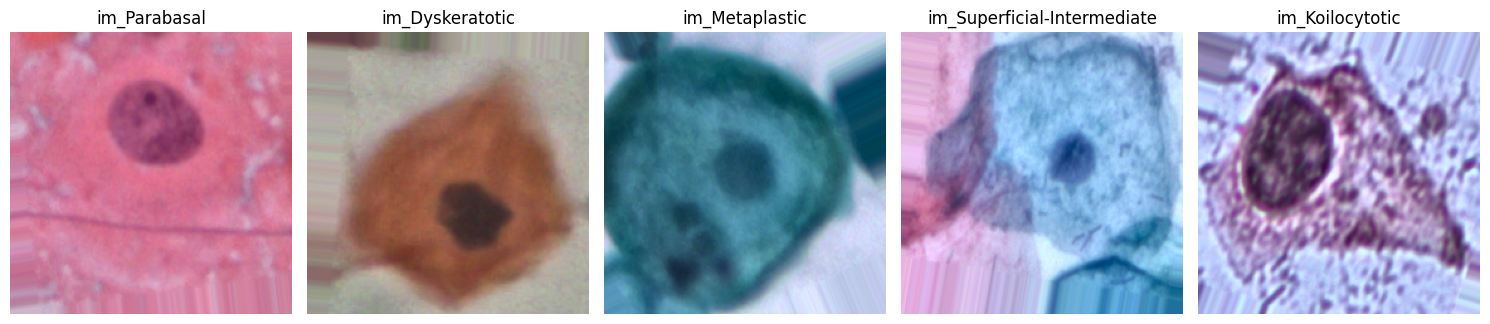

In [2]:
import os
import cv2
import matplotlib.pyplot as plt

augmented_dir = '/kaggle/input/pro-aug/preprocessed_cells_augmented'
IMG_SIZE = (224, 224)

plt.figure(figsize=(15, 8))
class_names = os.listdir(augmented_dir)

for i, class_name in enumerate(class_names):
    class_path = os.path.join(augmented_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    for fname in os.listdir(class_path):
        if fname.startswith('aug_') and fname.endswith(('.bmp', '.jpg', '.png')):
            img_path = os.path.join(class_path, fname)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            plt.subplot(1, len(class_names), i+1)
            plt.imshow(img)
            plt.title(class_name)
            plt.axis('off')
            break  # Show only 1 image per class

plt.tight_layout()
plt.show()


In [5]:
import os

dataset_dir = '/kaggle/input/prepro-augent/pro+aug'

total_images = 0
class_counts = {}

# Loop through each class folder
for class_name in os.listdir(dataset_dir):
    class_path = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_path):
        num_images = len([
            f for f in os.listdir(class_path)
            if f.lower().endswith(('.bmp', '.jpg', '.jpeg', '.png'))
        ])
        class_counts[class_name] = num_images
        total_images += num_images

# 📊 Print counts
print("📌 Image count per class:")
for cls, count in class_counts.items():
    print(f"{cls}: {count}")

print(f"\n✅ Total images in dataset: {total_images}")


📌 Image count per class:
im_Parabasal: 4746
im_Dyskeratotic: 4878
im_Metaplastic: 4758
im_Superficial-Intermediate: 4986
im_Koilocytotic: 4950

✅ Total images in dataset: 24318


In [4]:
import os
import shutil
from tqdm import tqdm

# Paths
original_dir = "/kaggle/input/prepro-augent/pro+aug"
subset_dir = "/kaggle/working/dataset_subset"
os.makedirs(subset_dir, exist_ok=True)

# Number of images per class to copy
images_per_class = 800

# Loop through each class folder in original dataset
for class_name in os.listdir(original_dir):
    class_src = os.path.join(original_dir, class_name)
    class_dst = os.path.join(subset_dir, class_name)
    os.makedirs(class_dst, exist_ok=True)

    # Collect all image filenames
    images = [f for f in os.listdir(class_src) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))]

    # Select first N images
    selected_images = images[:images_per_class]

    # Copy files
    for img_name in tqdm(selected_images, desc=f"Copying {class_name}"):
        src_path = os.path.join(class_src, img_name)
        dst_path = os.path.join(class_dst, img_name)
        shutil.copy2(src_path, dst_path)  # ✅ copy actual file

print("✅ Subset dataset created at:", subset_dir)


Copying im_Koilocytotic: 100%|██████████| 800/800 [00:05<00:00, 150.83it/s]

✅ Subset dataset created at: /kaggle/working/dataset_subset


In [7]:
# Directory where your subset augmented images are stored
subset_dir = "/kaggle/working/dataset_subset"

total_subset_images = 0

# Loop through each class folder in the subset directory
for class_name in os.listdir(subset_dir):
    class_path = os.path.join(subset_dir, class_name)
    if os.path.isdir(class_path):
        # Count images in the class folder
        num_images = len([f for f in os.listdir(class_path) if f.endswith(('.png', '.jpg', '.bmp'))])
        print(f"{class_name}: {num_images} images")
        total_subset_images += num_images

print(f"\nTotal images in the subset dataset: {total_subset_images}")

im_Dyskeratotic: 800 images
im_Superficial-Intermediate: 800 images
im_Koilocytotic: 800 images
im_Metaplastic: 800 images
im_Parabasal: 800 images

Total images in the subset dataset: 4000


📁 Using dataset from: /kaggle/working/dataset_subset
📁 Dataset exists: True
🏷️ Available classes: ['im_Metaplastic', 'im_Koilocytotic', 'im_Parabasal', 'im_Superficial-Intermediate', 'im_Dyskeratotic']
   • im_Metaplastic: 0 images
   • im_Koilocytotic: 0 images
   • im_Parabasal: 0 images
   • im_Superficial-Intermediate: 0 images
   • im_Dyskeratotic: 0 images

🔄 Creating data generators...
Found 3200 images belonging to 5 classes.
Found 800 images belonging to 5 classes.
✅ Training samples: 3200
✅ Validation samples: 800
✅ Number of classes: 5

🚀 Starting model training...

📋 Model Architecture:


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,605 (42.61 MB)

 Trainable params: 11,169,605 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 44s 391ms/step - accuracy: 0.4202 - loss: 1.3584 - val_accuracy: 0.6488 - val_loss: 0.8941 - learning_rate: 5.0000e-04
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 386ms/step - accuracy: 0.6584 - loss: 0.9318 - val_accuracy: 0.7750 - val_loss: 0.6282 - learning_rate: 5.0000e-04
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 382ms/step - accuracy: 0.7291 - loss: 0.7710 - val_accuracy: 0.7763 - val_loss: 0.6236 - learning_rate: 5.0000e-04
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 382ms/step - accuracy: 0.7788 - loss: 0.6255 - val_accuracy: 0.8037 - val_loss: 0.5591 - learning_rate: 5.0000e-04
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 389ms/step - accuracy: 0.7915 - loss: 0.5791 - val_accuracy: 0.8138 - val_loss: 0.5064 - learning_rate: 5.0000e-04
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 383ms/step - accuracy: 0.8167 - loss: 0.5361 - val_accuracy: 0.8000 - val_loss: 0.6130 - learning_rate: 5.0000e-04
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 38

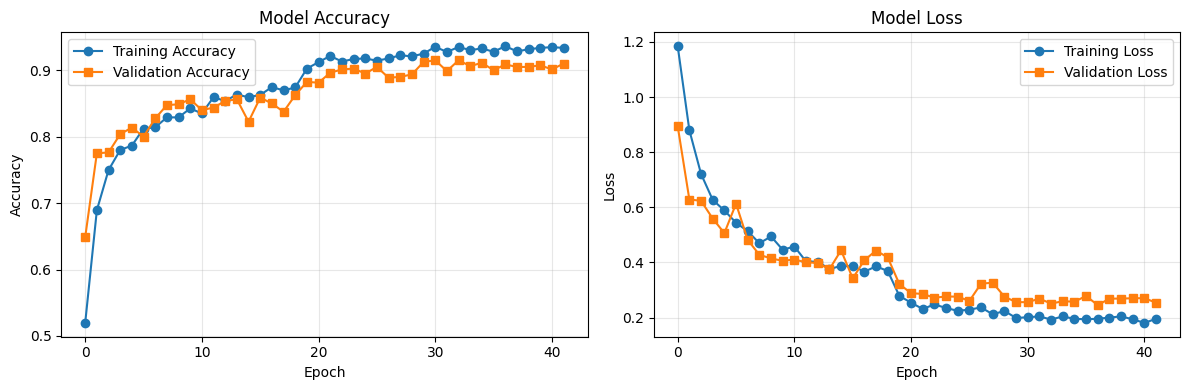

✅ Training plots saved at: /kaggle/working/training_plots.png

📦 Creating output archive...
✅ All outputs archived in: /kaggle/working/cnn_model_outputs.zip

📁 Output Files:
   • cnn_subset_model1_tf.keras: 127.87 MB
   • cnn_training_history.pkl: 0.00 MB
   • training_summary.txt: 0.00 MB
   • training_plots.png: 0.18 MB
   • cnn_model_outputs.zip: 128.06 MB

🎯 Training completed! Download 'cnn_model_outputs.zip' from Kaggle output section.


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import pickle
import zipfile
import shutil
import os

# 📁 Kaggle Dataset paths (modify according to your dataset)
# Option 1: If dataset is uploaded as Kaggle dataset
train_dir = '/kaggle/working/dataset_subset'

# Option 2: If dataset is in working directory
# train_dir = '/kaggle/working/subset_cells_augmented'

# Option 3: If you need to extract from zip
# zip_path = '/kaggle/input/your-dataset-name/subset_cells_augmented.zip'
# extract_dir = '/kaggle/working/subset_cells_augmented'
# 
# if not os.path.exists(extract_dir):
#     with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#         zip_ref.extractall('/kaggle/working/')
# 
# train_dir = extract_dir

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

print(f"📁 Using dataset from: {train_dir}")
print(f"📁 Dataset exists: {os.path.exists(train_dir)}")

# List available classes
if os.path.exists(train_dir):
    classes = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
    print(f"🏷️ Available classes: {classes}")
    for cls in classes:
        cls_path = os.path.join(train_dir, cls)
        num_images = len([f for f in os.listdir(cls_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
        print(f"   • {cls}: {num_images} images")

# Create ImageDataGenerator with validation_split
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0,1]
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2  # 20% for validation
)

# Create train and validation generators
print("\n🔄 Creating data generators...")
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

print(f"✅ Training samples: {train_generator.samples}")
print(f"✅ Validation samples: {val_generator.samples}")
print(f"✅ Number of classes: {train_generator.num_classes}")

# Define CNN model
def create_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(train_generator.num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0005),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Train the model
print("\n🚀 Starting model training...")
model = create_cnn_model()

# Print model summary
print("\n📋 Model Architecture:")
model.summary()

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,  # You can reduce this for faster testing
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

# Save model and history in Kaggle working directory
print("\n💾 Saving model and training history...")

# Save model (Kaggle working directory)
model_save_path = '/kaggle/working/cnn_subset_model1_tf.keras'
model.save(model_save_path)
print(f"✅ Model saved at: {model_save_path}")

# Save training history
history_save_path = '/kaggle/working/cnn_training_history.pkl'
with open(history_save_path, 'wb') as f:
    pickle.dump(history.history, f)
print(f"✅ Training history saved at: {history_save_path}")

# Save training summary
summary_path = '/kaggle/working/training_summary.txt'
with open(summary_path, 'w') as f:
    f.write("CNN Model Training Summary\n")
    f.write("=" * 30 + "\n\n")
    f.write(f"Training samples: {train_generator.samples}\n")
    f.write(f"Validation samples: {val_generator.samples}\n")
    f.write(f"Number of classes: {train_generator.num_classes}\n")
    f.write(f"Class indices: {train_generator.class_indices}\n")
    f.write(f"Image size: {IMG_SIZE}\n")
    f.write(f"Batch size: {BATCH_SIZE}\n")
    f.write(f"Total epochs trained: {len(history.history['loss'])}\n")
    f.write(f"Final training accuracy: {history.history['accuracy'][-1]:.4f}\n")
    f.write(f"Final validation accuracy: {history.history['val_accuracy'][-1]:.4f}\n")
    f.write(f"Final training loss: {history.history['loss'][-1]:.4f}\n")
    f.write(f"Final validation loss: {history.history['val_loss'][-1]:.4f}\n")

print(f"✅ Training summary saved at: {summary_path}")

# Quick evaluation
print("\n📊 Final Training Results:")
print(f"   • Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"   • Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"   • Final Training Loss: {history.history['loss'][-1]:.4f}")
print(f"   • Final Validation Loss: {history.history['val_loss'][-1]:.4f}")

# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='s')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/kaggle/working/training_plots.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Training plots saved at: /kaggle/working/training_plots.png")

# Create a zip file with all outputs for easy download
print("\n📦 Creating output archive...")
with zipfile.ZipFile('/kaggle/working/cnn_model_outputs.zip', 'w') as zipf:
    zipf.write(model_save_path, 'cnn_subset_model1_tf.keras')
    zipf.write(history_save_path, 'cnn_training_history.pkl')
    zipf.write(summary_path, 'training_summary.txt')
    zipf.write('/kaggle/working/training_plots.png', 'training_plots.png')

print("✅ All outputs archived in: /kaggle/working/cnn_model_outputs.zip")

# Print file sizes
print("\n📁 Output Files:")
for filename in [model_save_path, history_save_path, summary_path, '/kaggle/working/training_plots.png', '/kaggle/working/cnn_model_outputs.zip']:
    if os.path.exists(filename):
        size_mb = os.path.getsize(filename) / (1024 * 1024)
        print(f"   • {os.path.basename(filename)}: {size_mb:.2f} MB")

print("\n🎯 Training completed! Download 'cnn_model_outputs.zip' from Kaggle output section.")

🔄 Setting up data generators and loading model...
Found 800 images belonging to 5 classes.
✅ Validation generator created with 800 samples
✅ Model loaded successfully from /kaggle/working/cnn_subset_model1_tf.keras

🔄 Evaluating the loaded model on the validation set:


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



📊 Model Performance:
   • Validation Accuracy: 0.9237 (92.37%)
   • Validation Loss: 0.2381

🔍 Generating predictions...
📋 Classes found: ['im_Dyskeratotic', 'im_Koilocytotic', 'im_Metaplastic', 'im_Parabasal', 'im_Superficial-Intermediate']
📊 Total validation samples: 800

📋 CLASSIFICATION REPORT
                             precision    recall  f1-score   support

            im_Dyskeratotic       0.96      0.98      0.97       160
            im_Koilocytotic       0.92      0.82      0.87       160
             im_Metaplastic       0.87      0.93      0.90       160
               im_Parabasal       0.96      0.99      0.98       160
im_Superficial-Intermediate       0.92      0.89      0.91       160

                   accuracy                           0.92       800
                  macro avg       0.92      0.92      0.92       800
               weighted avg       0.92      0.92      0.92       800



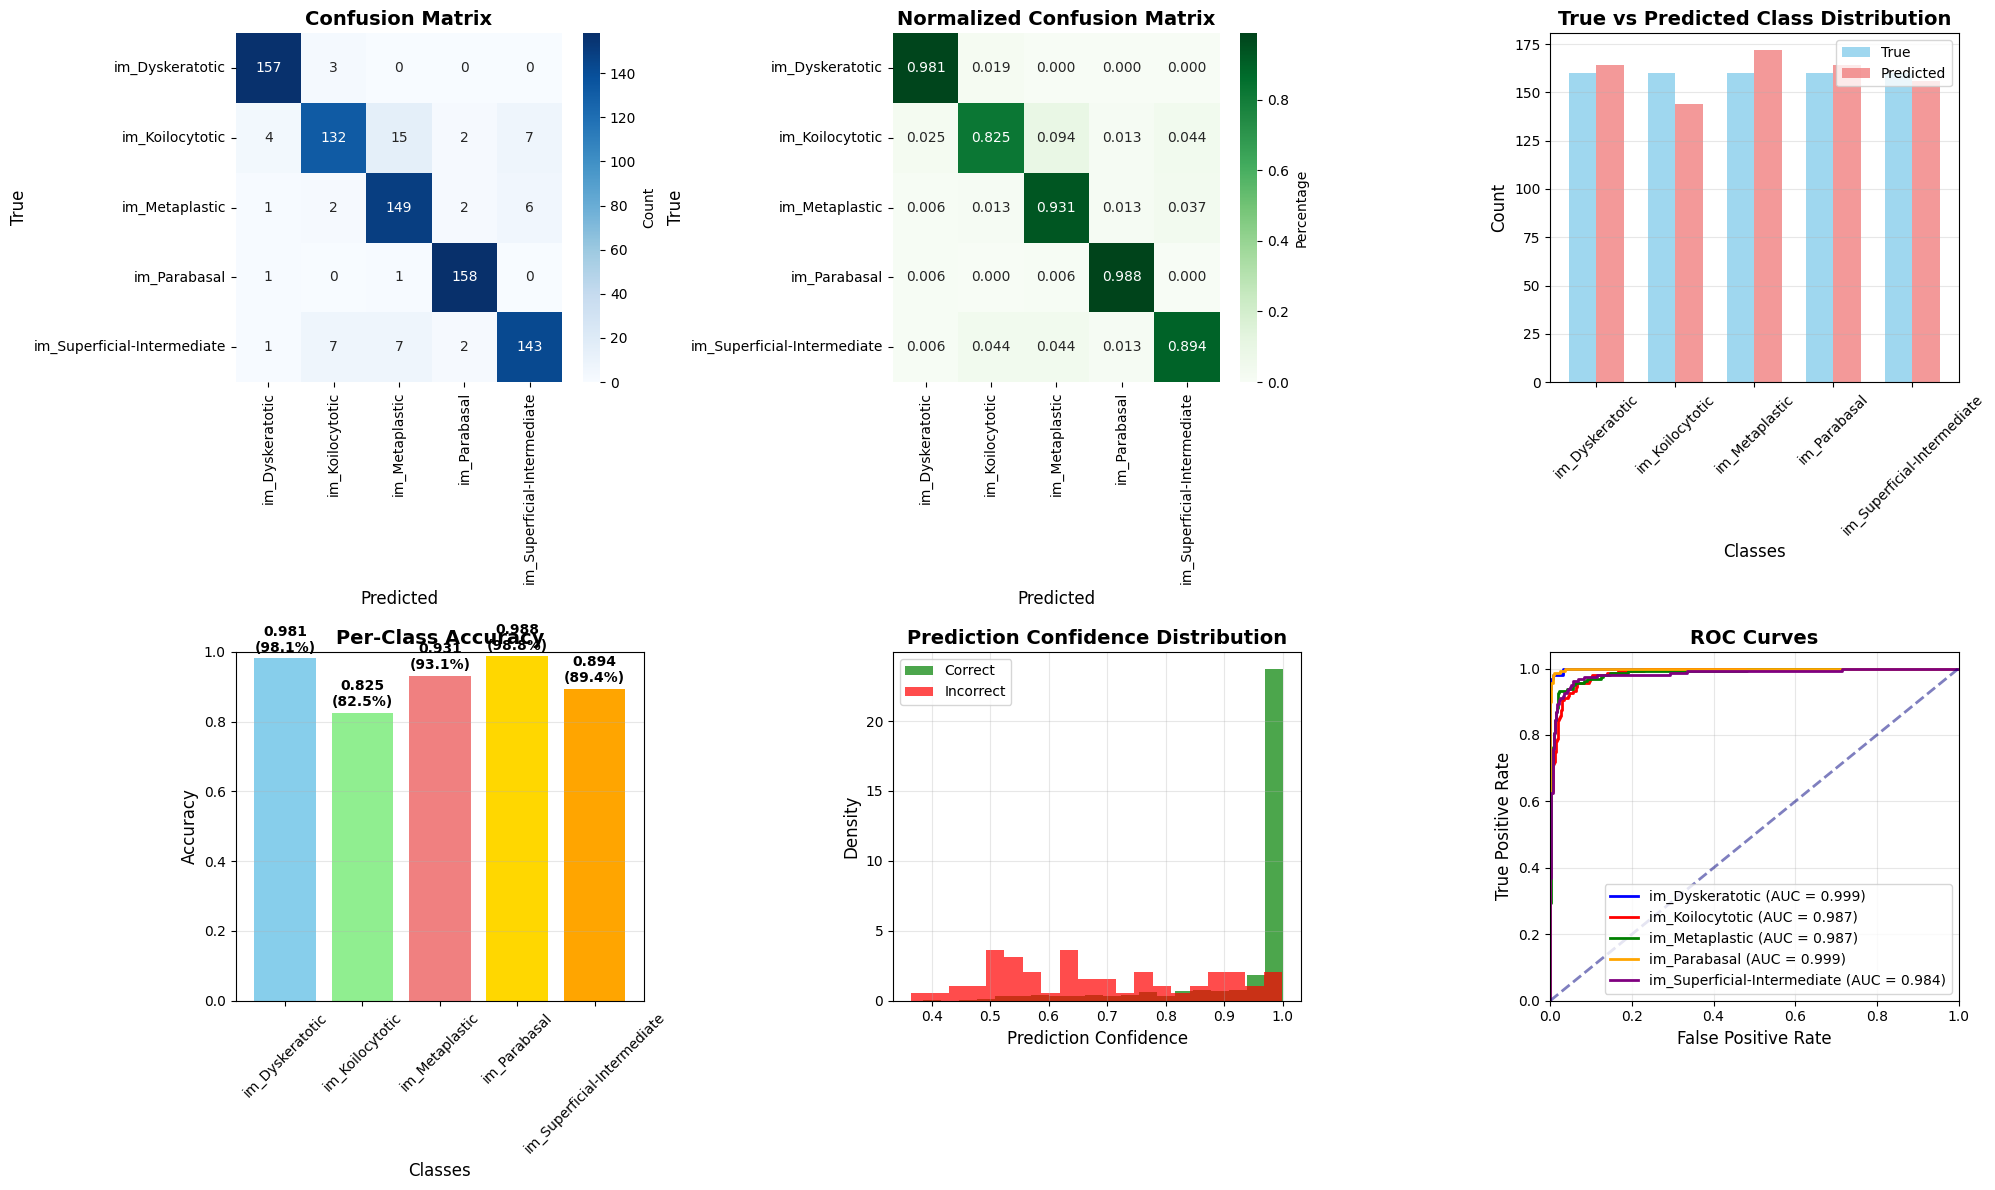


📊 DETAILED METRICS PER CLASS
                      Class  TP  TN  FP  FN Precision Recall F1-Score Specificity
            im_Dyskeratotic 157 633   7   3    0.9573 0.9812   0.9691      0.9891
            im_Koilocytotic 132 628  12  28    0.9167 0.8250   0.8684      0.9812
             im_Metaplastic 149 617  23  11    0.8663 0.9313   0.8976      0.9641
               im_Parabasal 158 634   6   2    0.9634 0.9875   0.9753      0.9906
im_Superficial-Intermediate 143 627  13  17    0.9167 0.8938   0.9051      0.9797

🎯 OVERALL MODEL STATISTICS
Overall Accuracy: 0.9237 (92.37%)
Overall Loss: 0.2381
Total Samples: 800
Correct Predictions: 739
Incorrect Predictions: 61

Prediction Confidence Statistics:
   • Mean Confidence: 0.9226
   • Median Confidence: 0.9964
   • Min Confidence: 0.3657
   • Max Confidence: 1.0000

⚠️  Low Confidence Predictions (< 0.7):
   • Count: 94
   • Percentage: 11.75%
   • Accuracy of low confidence predictions: 60.64%

✅ Model evaluation completed!


In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# =============================================================================
# STEP 1: LOAD MODEL AND SETUP DATA GENERATORS
# =============================================================================

# Define paths (modify according to your setup)
model_path = '/kaggle/working/cnn_subset_model1_tf.keras'  # Your model path
train_dir = '/kaggle/working/dataset_subset'  # Your data directory
IMG_SIZE = (224, 224)

print("🔄 Setting up data generators and loading model...")

# Define ImageDataGenerator for validation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create validation generator
val_gen = datagen.flow_from_directory(
    train_dir, 
    target_size=IMG_SIZE, 
    batch_size=32, 
    class_mode='categorical', 
    subset='validation', 
    shuffle=False
)

print(f"✅ Validation generator created with {val_gen.samples} samples")

# Load the saved model
try:
    loaded_model = tf.keras.models.load_model(model_path)
    print(f"✅ Model loaded successfully from {model_path}")
except Exception as e:
    print(f"❌ Error loading model: {e}")
    print("Please check your model path and try again.")
    exit()

# =============================================================================
# STEP 2: MODEL EVALUATION
# =============================================================================

# Evaluate the loaded model on the validation set
print("\n🔄 Evaluating the loaded model on the validation set:")
val_loss, val_accuracy = loaded_model.evaluate(val_gen, verbose=0)
print(f"\n📊 Model Performance:")
print(f"   • Validation Accuracy: {val_accuracy:.4f} ({val_accuracy*100:.2f}%)")
print(f"   • Validation Loss: {val_loss:.4f}")

# Get the true labels and predicted labels for the validation set
print("\n🔍 Generating predictions...")
val_gen.reset()  # Ensure the generator starts from the beginning
y_pred_probs = loaded_model.predict(val_gen, verbose=0)
y_true = val_gen.classes
y_pred = np.argmax(y_pred_probs, axis=1)

# Get the class names
class_names = list(val_gen.class_indices.keys())
print(f"📋 Classes found: {class_names}")
print(f"📊 Total validation samples: {len(y_true)}")

# Print classification report
print("\n" + "="*50)
print("📋 CLASSIFICATION REPORT")
print("="*50)
print(classification_report(y_true, y_pred, target_names=class_names))

# =============================================================================
# STEP 3: COMPREHENSIVE VISUALIZATION
# =============================================================================

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Create a comprehensive visualization
fig = plt.figure(figsize=(20, 12))

# 1. Confusion Matrix
plt.subplot(2, 3, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')

# 2. Normalized Confusion Matrix
plt.subplot(2, 3, 2)
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_matrix_norm, annot=True, fmt='.3f', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Percentage'})
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.title('Normalized Confusion Matrix', fontsize=14, fontweight='bold')

# 3. Class Distribution
plt.subplot(2, 3, 3)
unique_true, counts_true = np.unique(y_true, return_counts=True)
unique_pred, counts_pred = np.unique(y_pred, return_counts=True)

# Ensure all classes are represented
all_counts_true = np.zeros(len(class_names))
all_counts_pred = np.zeros(len(class_names))

for i, count in zip(unique_true, counts_true):
    all_counts_true[i] = count
    
for i, count in zip(unique_pred, counts_pred):
    all_counts_pred[i] = count

x = np.arange(len(class_names))
width = 0.35

plt.bar(x - width/2, all_counts_true, width, label='True', alpha=0.8, color='skyblue')
plt.bar(x + width/2, all_counts_pred, width, label='Predicted', alpha=0.8, color='lightcoral')

plt.xlabel('Classes', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('True vs Predicted Class Distribution', fontsize=14, fontweight='bold')
plt.xticks(x, class_names, rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# 4. Per-class Accuracy
plt.subplot(2, 3, 4)
class_accuracies = []
for i in range(len(class_names)):
    class_mask = (y_true == i)
    if np.sum(class_mask) > 0:
        class_acc = np.sum((y_true == i) & (y_pred == i)) / np.sum(class_mask)
        class_accuracies.append(class_acc)
    else:
        class_accuracies.append(0)

colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold', 'orange'][:len(class_names)]
bars = plt.bar(class_names, class_accuracies, color=colors)
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Per-Class Accuracy', fontsize=14, fontweight='bold')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add percentage labels on bars
for bar, acc in zip(bars, class_accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{acc:.3f}\n({acc*100:.1f}%)', ha='center', va='bottom', fontweight='bold')

# 5. Prediction Confidence Distribution
plt.subplot(2, 3, 5)
max_probs = np.max(y_pred_probs, axis=1)
correct_mask = (y_true == y_pred)

plt.hist(max_probs[correct_mask], bins=20, alpha=0.7, label='Correct', color='green', density=True)
plt.hist(max_probs[~correct_mask], bins=20, alpha=0.7, label='Incorrect', color='red', density=True)
plt.xlabel('Prediction Confidence', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Prediction Confidence Distribution', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

# 6. ROC Curves (for multi-class)
plt.subplot(2, 3, 6)
if len(class_names) == 2:
    # Binary classification ROC
    fpr, tpr, _ = roc_curve(y_true, y_pred_probs[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
else:
    # Multi-class ROC
    y_true_bin = label_binarize(y_true, classes=range(len(class_names)))
    colors = ['blue', 'red', 'green', 'orange', 'purple']
    for i in range(len(class_names)):
        if i < len(colors):
            fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, color=colors[i], lw=2, 
                    label=f'{class_names[i]} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', alpha=0.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# STEP 4: DETAILED METRICS
# =============================================================================

# Detailed metrics table
print("\n" + "="*70)
print("📊 DETAILED METRICS PER CLASS")
print("="*70)

metrics_data = []
for i, class_name in enumerate(class_names):
    tp = conf_matrix[i, i]
    fp = conf_matrix[:, i].sum() - tp
    fn = conf_matrix[i, :].sum() - tp
    tn = conf_matrix.sum() - (tp + fp + fn)
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    metrics_data.append({
        'Class': class_name,
        'TP': tp,
        'TN': tn, 
        'FP': fp,
        'FN': fn,
        'Precision': f'{precision:.4f}',
        'Recall': f'{recall:.4f}',
        'F1-Score': f'{f1:.4f}',
        'Specificity': f'{specificity:.4f}'
    })

metrics_df = pd.DataFrame(metrics_data)
print(metrics_df.to_string(index=False))

# Overall model statistics
print(f"\n" + "="*50)
print("🎯 OVERALL MODEL STATISTICS")
print("="*50)
print(f"Overall Accuracy: {val_accuracy:.4f} ({val_accuracy*100:.2f}%)")
print(f"Overall Loss: {val_loss:.4f}")
print(f"Total Samples: {len(y_true)}")
print(f"Correct Predictions: {np.sum(y_true == y_pred)}")
print(f"Incorrect Predictions: {np.sum(y_true != y_pred)}")

# Confidence statistics
print(f"\nPrediction Confidence Statistics:")
print(f"   • Mean Confidence: {np.mean(max_probs):.4f}")
print(f"   • Median Confidence: {np.median(max_probs):.4f}")
print(f"   • Min Confidence: {np.min(max_probs):.4f}")
print(f"   • Max Confidence: {np.max(max_probs):.4f}")

# Low confidence predictions
low_conf_threshold = 0.7
low_conf_mask = max_probs < low_conf_threshold
if np.sum(low_conf_mask) > 0:
    print(f"\n⚠️  Low Confidence Predictions (< {low_conf_threshold}):")
    print(f"   • Count: {np.sum(low_conf_mask)}")
    print(f"   • Percentage: {np.sum(low_conf_mask)/len(max_probs)*100:.2f}%")
    print(f"   • Accuracy of low confidence predictions: {np.sum(correct_mask[low_conf_mask])/np.sum(low_conf_mask)*100:.2f}%")

print("\n✅ Model evaluation completed!")

In [2]:
!pip install keras-tuner --quiet

In [9]:
!pip install keras-tuner --quiet

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt
import pandas as pd
import os

# =========================
# Dataset Path
# =========================
train_dir = '/kaggle/working/dataset_subset'
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# =========================
# Data Generators
# =========================
def get_data_generators(batch_size=BATCH_SIZE):
    datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=25,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        validation_split=0.2
    )
    train_gen = datagen.flow_from_directory(
        train_dir,
        target_size=IMG_SIZE,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training',
        shuffle=True
    )
    val_gen = datagen.flow_from_directory(
        train_dir,
        target_size=IMG_SIZE,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation',
        shuffle=False
    )
    return train_gen, val_gen

train_generator, val_generator = get_data_generators()

# =========================
# Model Builder
# =========================
def build_model(hp):
    dropout_rate = hp.Choice('dropout_rate', values=[0.5, 0.7])
    activation_func = hp.Choice('activation', values=['relu', 'tanh'])
    learning_rate = hp.Choice('learning_rate', values=[0.001, 0.0001, 0.01])
    optimizer_choice = hp.Choice('optimizer', values=['adam', 'rmsprop'])
    batch_size = hp.Choice('batch_size', values=[16, 32])
    kernel_size = hp.Choice('kernel_size', values=[3, 5])

    model = Sequential([
        Conv2D(32, (kernel_size, kernel_size), activation=activation_func, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
        MaxPooling2D(2,2),
        Conv2D(64, (kernel_size, kernel_size), activation=activation_func),
        MaxPooling2D(2,2),
        Conv2D(128, (kernel_size, kernel_size), activation=activation_func),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(512, activation=activation_func),  # fixed 512 units
        Dropout(dropout_rate),
        Dense(train_generator.num_classes, activation='softmax')
    ])

    optimizer = Adam(learning_rate=learning_rate) if optimizer_choice=='adam' else RMSprop(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


# =========================
# Tuner Setup
# =========================
tuner = kt.GridSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Total combinations
    directory='/kaggle/working/hp_tuning',
    project_name='cnn_tuning'
)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# =========================
# Run Search
# =========================
tuner.search(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[early_stop],
    verbose=1
)

# =========================
# Collect All Results
# =========================
results = []
for trial in tuner.oracle.get_best_trials(num_trials=36):
    hp = trial.hyperparameters.values
    # Use get_last_value to get the last recorded val_accuracy
    acc = trial.metrics.get_last_value('val_accuracy')
    results.append({**hp, 'val_accuracy': acc})

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='val_accuracy', ascending=False)

print("\n📊 All Hyperparameter Combinations and Validation Accuracies:")
print(results_df)

# Save results
results_df.to_csv("/kaggle/working/hp_tuning_results_for_cnn1.csv", index=False)
print("\n✅ Results saved to /kaggle/working/hp_tuning_results_cnn_1.csv")

# =========================
# Best Hyperparameters
# =========================
best_hp = tuner.get_best_hyperparameters(1)[0]
print("\n🏆 Best Hyperparameters Found:")
for param, value in best_hp.values.items():
    print(f"{param}: {value}")

# =========================
# Train Final Model with Best Params
# =========================
final_model = build_model(best_hp)
history = final_model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[early_stop],
    verbose=1
)

final_acc = history.history['val_accuracy'][-1]
print(f"\n🎯 Final Model Validation Accuracy: {final_acc:.4f}")

final_model.save('/kaggle/working/cnn_best_model_1.keras')


Found 3200 images belonging to 5 classes.
Found 800 images belonging to 5 classes.
Reloading Tuner from /kaggle/working/hp_tuning/cnn_tuning/tuner0.json

📊 All Hyperparameter Combinations and Validation Accuracies:
   dropout_rate activation  learning_rate optimizer  batch_size  kernel_size  \
0           0.5       relu         0.0001      adam          16            3   
1           0.5       relu         0.0010      adam          32            3   
2           0.5       relu         0.0010   rmsprop          16            3   
3           0.5       relu         0.0010      adam          16            5   
4           0.5       relu         0.0010      adam          16            3   
5           0.5       relu         0.0010   rmsprop          32            5   
6           0.5       relu         0.0010   rmsprop          32            3   
7           0.5       relu         0.0001      adam          16            5   
8           0.5       relu         0.0010      adam          32  

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 44s 400ms/step - accuracy: 0.4629 - loss: 1.2798 - val_accuracy: 0.7400 - val_loss: 0.7943
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 403ms/step - accuracy: 0.7232 - loss: 0.7889 - val_accuracy: 0.7425 - val_loss: 0.6748
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 392ms/step - accuracy: 0.7745 - loss: 0.6549 - val_accuracy: 0.7950 - val_loss: 0.6081
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 393ms/step - accuracy: 0.7940 - loss: 0.5717 - val_accuracy: 0.8087 - val_loss: 0.5292
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 390ms/step - accuracy: 0.8255 - loss: 0.4997 - val_accuracy: 0.8125 - val_loss: 0.4958
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 388ms/step - accuracy: 0.8383 - loss: 0.4557 - val_accuracy: 0.8012 - val_loss: 0.5028
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 390ms/step - accuracy: 0.8356 - loss: 0.4613 - val_accuracy: 0.8213 - val_loss: 0.4593
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 394ms/step - accuracy: 0.8485 - loss: 0

🔄 Setting up data generators and loading model...
Found 800 images belonging to 5 classes.
✅ Validation generator created with 800 samples
✅ Model loaded successfully from /kaggle/working/cnn_best_model_1.keras
⚠️  Training history file not found at /kaggle/working/training_history.npy
    Training history plots will be skipped.

🔄 Evaluating the loaded model on the validation set:


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



📊 Model Performance:
   • Validation Accuracy: 0.9050 (90.50%)
   • Validation Loss: 0.2541

🔍 Generating predictions...
📋 Classes found: ['im_Dyskeratotic', 'im_Koilocytotic', 'im_Metaplastic', 'im_Parabasal', 'im_Superficial-Intermediate']
📊 Total validation samples: 800

📋 CLASSIFICATION REPORT
                             precision    recall  f1-score   support

            im_Dyskeratotic       0.97      0.97      0.97       160
            im_Koilocytotic       0.90      0.84      0.87       160
             im_Metaplastic       0.84      0.85      0.85       160
               im_Parabasal       0.96      0.94      0.95       160
im_Superficial-Intermediate       0.85      0.93      0.89       160

                   accuracy                           0.91       800
                  macro avg       0.91      0.91      0.91       800
               weighted avg       0.91      0.91      0.91       800



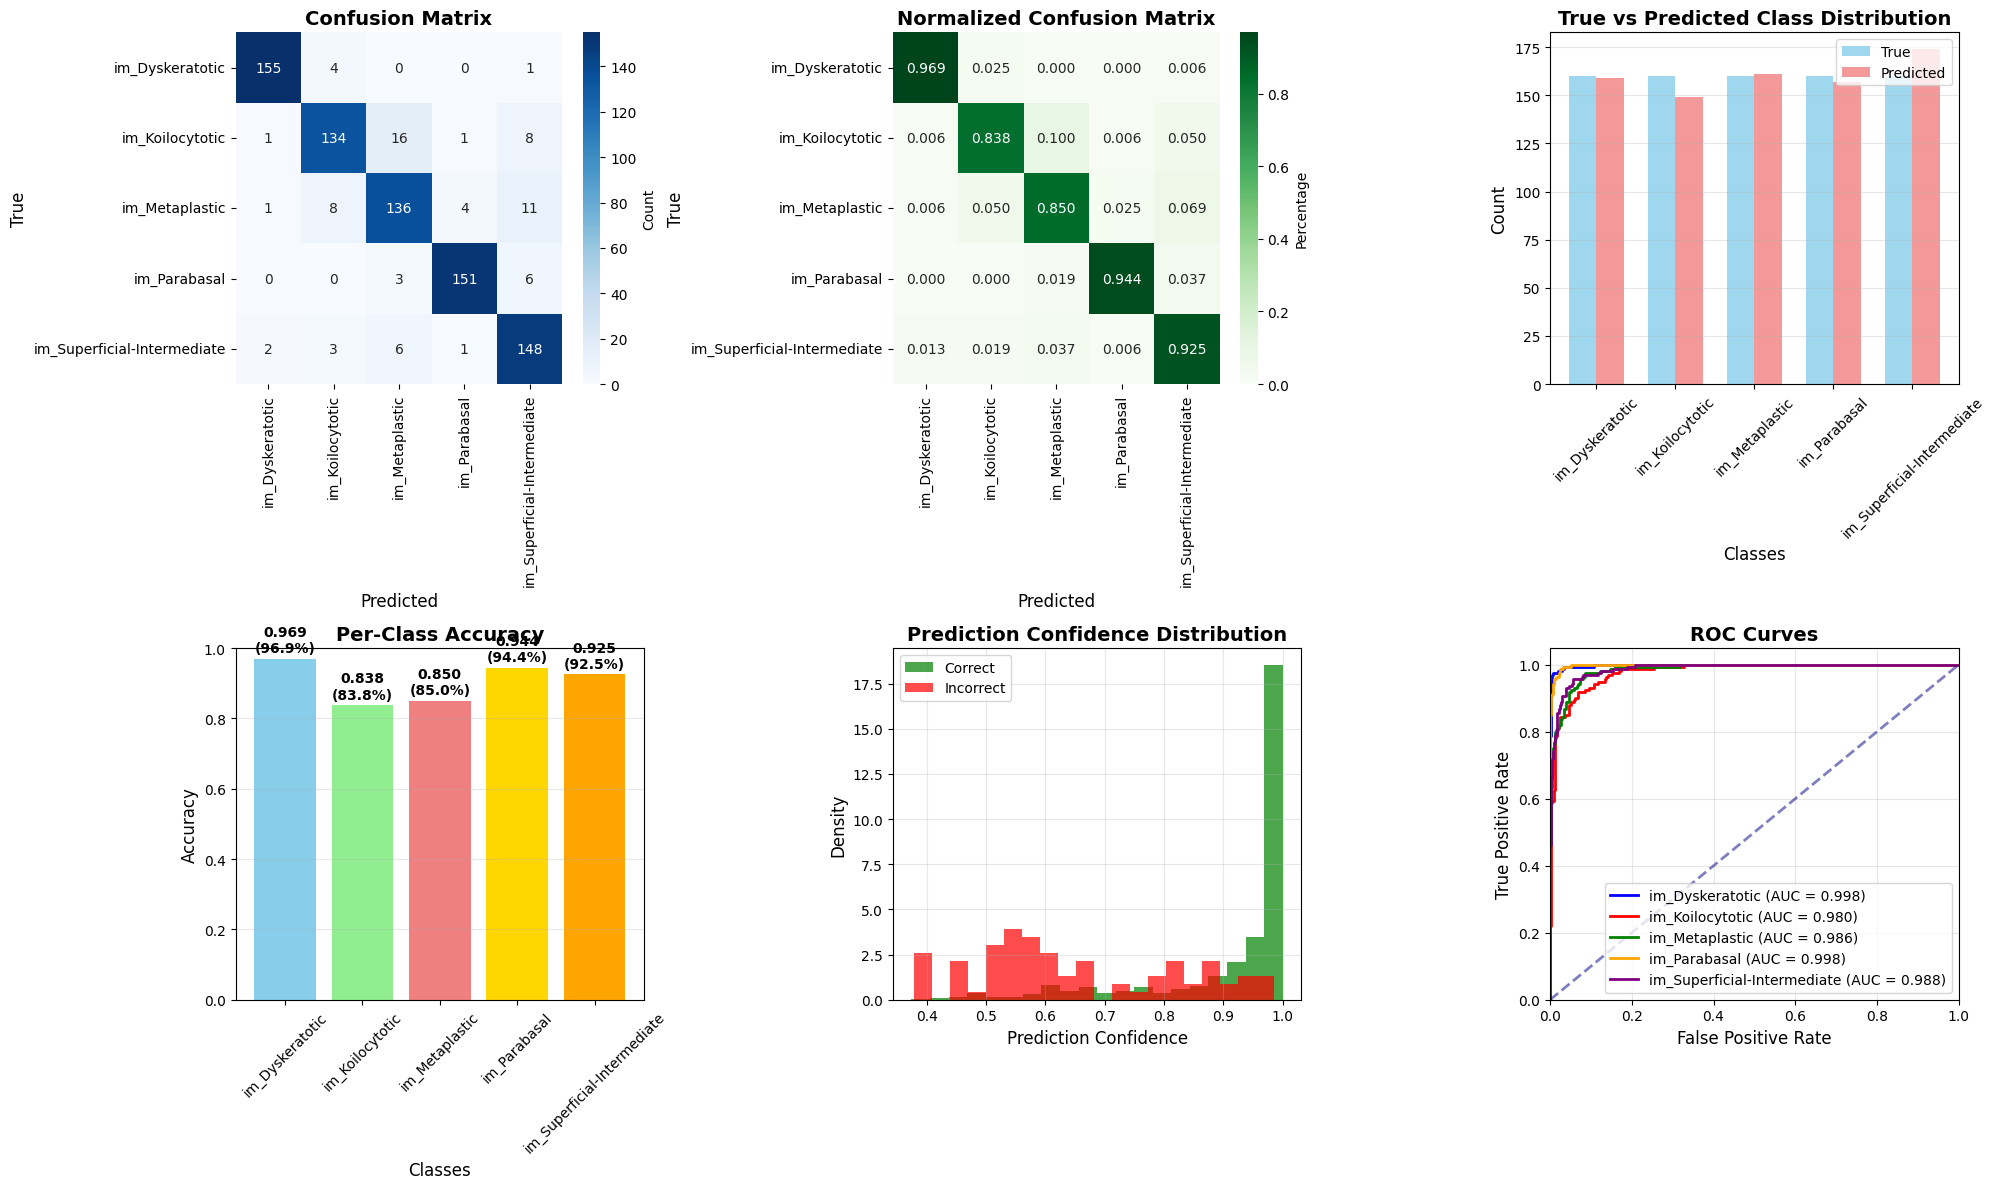


📊 DETAILED METRICS PER CLASS
                      Class  TP  TN  FP  FN Precision Recall F1-Score Specificity
            im_Dyskeratotic 155 636   4   5    0.9748 0.9688   0.9718      0.9938
            im_Koilocytotic 134 625  15  26    0.8993 0.8375   0.8673      0.9766
             im_Metaplastic 136 615  25  24    0.8447 0.8500   0.8474      0.9609
               im_Parabasal 151 634   6   9    0.9618 0.9437   0.9527      0.9906
im_Superficial-Intermediate 148 614  26  12    0.8506 0.9250   0.8862      0.9594

🎯 OVERALL MODEL STATISTICS
Overall Accuracy: 0.9050 (90.50%)
Overall Loss: 0.2541
Total Samples: 800
Correct Predictions: 724
Incorrect Predictions: 76

Prediction Confidence Statistics:
   • Mean Confidence: 0.8916
   • Median Confidence: 0.9741
   • Min Confidence: 0.3744
   • Max Confidence: 1.0000

⚠️  Low Confidence Predictions (< 0.7):
   • Count: 126
   • Percentage: 15.75%
   • Accuracy of low confidence predictions: 60.32%

✅ Model evaluation completed!


In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# =============================================================================
# STEP 1: LOAD MODEL AND SETUP DATA GENERATORS
# =============================================================================

# Define paths (modify according to your setup)
model_path = '/kaggle/working/cnn_best_model_1.keras'  # Your model path
train_dir = '/kaggle/working/dataset_subset'  # Your data directory
history_path = '/kaggle/working/training_history.npy'  # Path to saved training history (optional)
IMG_SIZE = (224, 224)

print("🔄 Setting up data generators and loading model...")

# Define ImageDataGenerator for validation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create validation generator
val_gen = datagen.flow_from_directory(
    train_dir, 
    target_size=IMG_SIZE, 
    batch_size=32, 
    class_mode='categorical', 
    subset='validation', 
    shuffle=False
)

print(f"✅ Validation generator created with {val_gen.samples} samples")

# Load the saved model
try:
    loaded_model = tf.keras.models.load_model(model_path)
    print(f"✅ Model loaded successfully from {model_path}")
except Exception as e:
    print(f"❌ Error loading model: {e}")
    print("Please check your model path and try again.")
    exit()

# Load training history if available
history = None
try:
    if os.path.exists(history_path):
        history_dict = np.load(history_path, allow_pickle=True).item()
        print(f"✅ Training history loaded from {history_path}")
        history = type('History', (), {'history': history_dict})()
    else:
        print(f"⚠️  Training history file not found at {history_path}")
        print("    Training history plots will be skipped.")
except Exception as e:
    print(f"⚠️  Could not load training history: {e}")
    print("    Training history plots will be skipped.")

# =============================================================================
# STEP 2: MODEL EVALUATION
# =============================================================================

# Evaluate the loaded model on the validation set
print("\n🔄 Evaluating the loaded model on the validation set:")
val_loss, val_accuracy = loaded_model.evaluate(val_gen, verbose=0)
print(f"\n📊 Model Performance:")
print(f"   • Validation Accuracy: {val_accuracy:.4f} ({val_accuracy*100:.2f}%)")
print(f"   • Validation Loss: {val_loss:.4f}")

# Get the true labels and predicted labels for the validation set
print("\n🔍 Generating predictions...")
val_gen.reset()  # Ensure the generator starts from the beginning
y_pred_probs = loaded_model.predict(val_gen, verbose=0)
y_true = val_gen.classes
y_pred = np.argmax(y_pred_probs, axis=1)

# Get the class names
class_names = list(val_gen.class_indices.keys())
print(f"📋 Classes found: {class_names}")
print(f"📊 Total validation samples: {len(y_true)}")

# Print classification report
print("\n" + "="*50)
print("📋 CLASSIFICATION REPORT")
print("="*50)
print(classification_report(y_true, y_pred, target_names=class_names))

# =============================================================================
# STEP 3: TRAINING HISTORY VISUALIZATION (if available)
# =============================================================================

if history is not None:
    print("\n🔄 Plotting training history...")
    # Plot training history
    plt.figure(figsize=(12, 4))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker='s')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('/kaggle/working/training_plots.png', dpi=300, bbox_inches='tight')
    plt.show()
    print("✅ Training history plots saved and displayed!")

# =============================================================================
# STEP 4: COMPREHENSIVE EVALUATION VISUALIZATION
# =============================================================================

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Create a comprehensive visualization
fig = plt.figure(figsize=(20, 12))

# 1. Confusion Matrix
plt.subplot(2, 3, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')

# 2. Normalized Confusion Matrix
plt.subplot(2, 3, 2)
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
sns.heatmap(conf_matrix_norm, annot=True, fmt='.3f', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Percentage'})
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.title('Normalized Confusion Matrix', fontsize=14, fontweight='bold')

# 3. Class Distribution
plt.subplot(2, 3, 3)
unique_true, counts_true = np.unique(y_true, return_counts=True)
unique_pred, counts_pred = np.unique(y_pred, return_counts=True)

# Ensure all classes are represented
all_counts_true = np.zeros(len(class_names))
all_counts_pred = np.zeros(len(class_names))

for i, count in zip(unique_true, counts_true):
    all_counts_true[i] = count
    
for i, count in zip(unique_pred, counts_pred):
    all_counts_pred[i] = count

x = np.arange(len(class_names))
width = 0.35

plt.bar(x - width/2, all_counts_true, width, label='True', alpha=0.8, color='skyblue')
plt.bar(x + width/2, all_counts_pred, width, label='Predicted', alpha=0.8, color='lightcoral')

plt.xlabel('Classes', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('True vs Predicted Class Distribution', fontsize=14, fontweight='bold')
plt.xticks(x, class_names, rotation=45)
plt.legend()
plt.grid(axis='y', alpha=0.3)

# 4. Per-class Accuracy
plt.subplot(2, 3, 4)
class_accuracies = []
for i in range(len(class_names)):
    class_mask = (y_true == i)
    if np.sum(class_mask) > 0:
        class_acc = np.sum((y_true == i) & (y_pred == i)) / np.sum(class_mask)
        class_accuracies.append(class_acc)
    else:
        class_accuracies.append(0)

colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold', 'orange'][:len(class_names)]
bars = plt.bar(class_names, class_accuracies, color=colors)
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Per-Class Accuracy', fontsize=14, fontweight='bold')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add percentage labels on bars
for bar, acc in zip(bars, class_accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{acc:.3f}\n({acc*100:.1f}%)', ha='center', va='bottom', fontweight='bold')

# 5. Prediction Confidence Distribution
plt.subplot(2, 3, 5)
max_probs = np.max(y_pred_probs, axis=1)
correct_mask = (y_true == y_pred)

plt.hist(max_probs[correct_mask], bins=20, alpha=0.7, label='Correct', color='green', density=True)
plt.hist(max_probs[~correct_mask], bins=20, alpha=0.7, label='Incorrect', color='red', density=True)
plt.xlabel('Prediction Confidence', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Prediction Confidence Distribution', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

# 6. ROC Curves (for multi-class)
plt.subplot(2, 3, 6)
if len(class_names) == 2:
    # Binary classification ROC
    fpr, tpr, _ = roc_curve(y_true, y_pred_probs[:, 1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
else:
    # Multi-class ROC
    y_true_bin = label_binarize(y_true, classes=range(len(class_names)))
    colors = ['blue', 'red', 'green', 'orange', 'purple']
    for i in range(len(class_names)):
        if i < len(colors):
            fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, color=colors[i], lw=2, 
                    label=f'{class_names[i]} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', alpha=0.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# =============================================================================
# STEP 5: DETAILED METRICS
# =============================================================================

# Detailed metrics table
print("\n" + "="*70)
print("📊 DETAILED METRICS PER CLASS")
print("="*70)

metrics_data = []
for i, class_name in enumerate(class_names):
    tp = conf_matrix[i, i]
    fp = conf_matrix[:, i].sum() - tp
    fn = conf_matrix[i, :].sum() - tp
    tn = conf_matrix.sum() - (tp + fp + fn)
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    
    metrics_data.append({
        'Class': class_name,
        'TP': tp,
        'TN': tn, 
        'FP': fp,
        'FN': fn,
        'Precision': f'{precision:.4f}',
        'Recall': f'{recall:.4f}',
        'F1-Score': f'{f1:.4f}',
        'Specificity': f'{specificity:.4f}'
    })

metrics_df = pd.DataFrame(metrics_data)
print(metrics_df.to_string(index=False))

# Overall model statistics
print(f"\n" + "="*50)
print("🎯 OVERALL MODEL STATISTICS")
print("="*50)
print(f"Overall Accuracy: {val_accuracy:.4f} ({val_accuracy*100:.2f}%)")
print(f"Overall Loss: {val_loss:.4f}")
print(f"Total Samples: {len(y_true)}")
print(f"Correct Predictions: {np.sum(y_true == y_pred)}")
print(f"Incorrect Predictions: {np.sum(y_true != y_pred)}")

# Confidence statistics
print(f"\nPrediction Confidence Statistics:")
print(f"   • Mean Confidence: {np.mean(max_probs):.4f}")
print(f"   • Median Confidence: {np.median(max_probs):.4f}")
print(f"   • Min Confidence: {np.min(max_probs):.4f}")
print(f"   • Max Confidence: {np.max(max_probs):.4f}")

# Low confidence predictions
low_conf_threshold = 0.7
low_conf_mask = max_probs < low_conf_threshold
if np.sum(low_conf_mask) > 0:
    print(f"\n⚠️  Low Confidence Predictions (< {low_conf_threshold}):")
    print(f"   • Count: {np.sum(low_conf_mask)}")
    print(f"   • Percentage: {np.sum(low_conf_mask)/len(max_probs)*100:.2f}%")
    print(f"   • Accuracy of low confidence predictions: {np.sum(correct_mask[low_conf_mask])/np.sum(low_conf_mask)*100:.2f}%")

print("\n✅ Model evaluation completed!")

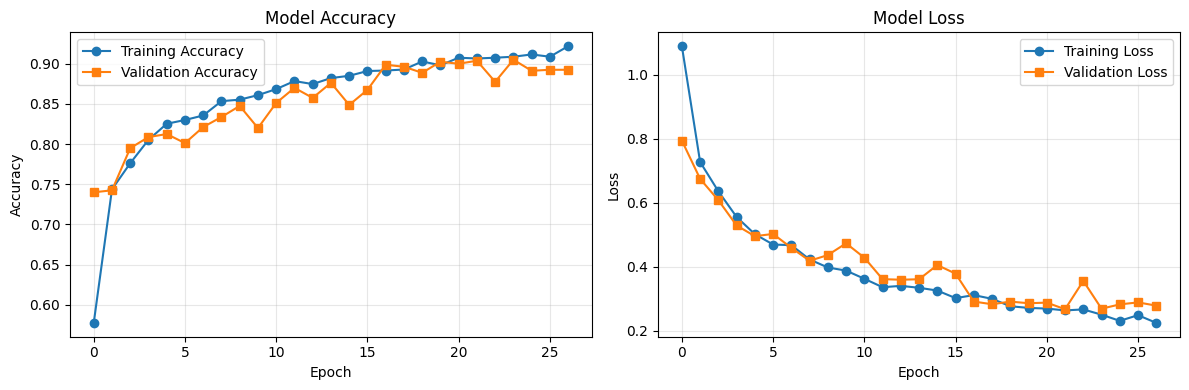

In [20]:
# Plot training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(final_model.history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(final_model.history.history['val_accuracy'], label='Validation Accuracy', marker='s')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(final_model.history.history['loss'], label='Training Loss', marker='o')
plt.plot(final_model.history.history['val_loss'], label='Validation Loss', marker='s')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('/kaggle/working/training_plots2.png', dpi=300, bbox_inches='tight')
plt.show()